In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DataFrame = pd.read_csv('Zomato data .csv')


In [3]:
DataFrame.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [4]:
#checking if any value is null
DataFrame.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
#converting the datatype of column 'Rate'
def handleRate(value) : 
    value = str(value).split('/')
    value = value[0];
    return float(value)

DataFrame['rate'] = DataFrame['rate'].apply(handleRate)

In [6]:
#or

In [7]:
DataFrame['Rate'] = DataFrame['Rate'].str.replace('/5', '')
DataFrame['Rate'] = DataFrame['Rate'].astype(float)

In [8]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [9]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## What type of resturant do the majority of customer prefer?

In [10]:
DataFrame['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

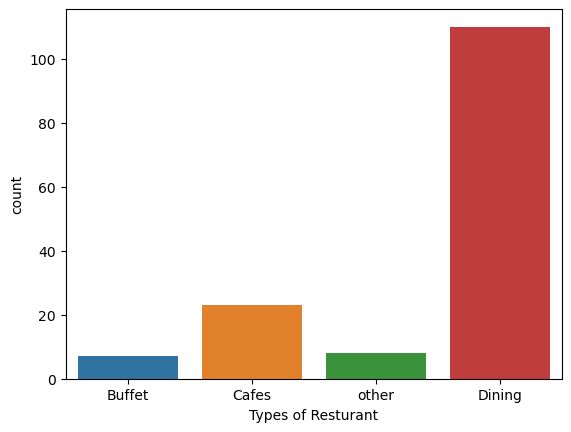

In [11]:
sns.countplot(x = DataFrame['listed_in(type)'])
plt.xlabel('Types of Resturant')
plt.show()

## How many votes has each type of resturant recieved from customers?

In [12]:
DataFrame.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

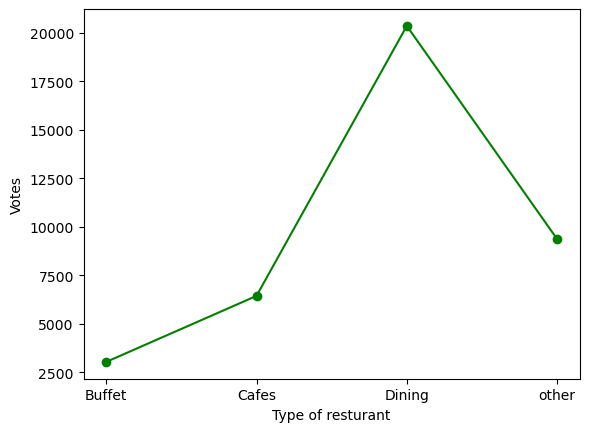

In [13]:
grouped_data = DataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'green', marker = 'o')
plt.xlabel('Type of resturant')
plt.ylabel('Votes');

## What are the ratings that the majority of resturants have recieved?

In [14]:
DataFrame['rate'].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

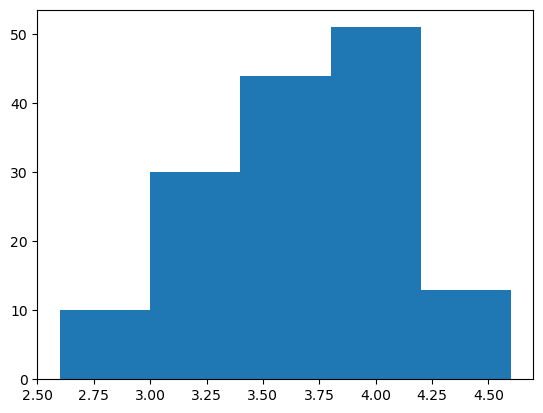

In [15]:
plt.hist(DataFrame['rate'], bins = 5)
plt.show()

## What is the average spending of couples?

In [16]:
DataFrame['approx_cost(for two people)'].mean()

418.2432432432432

In [17]:
DataFrame['approx_cost(for two people)'].median()

400.0

In [18]:
DataFrame['approx_cost(for two people)'].mode()

0    300
Name: approx_cost(for two people), dtype: int64

In [19]:
DataFrame['listed_in(type)'].mode()

0    Dining
Name: listed_in(type), dtype: object

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

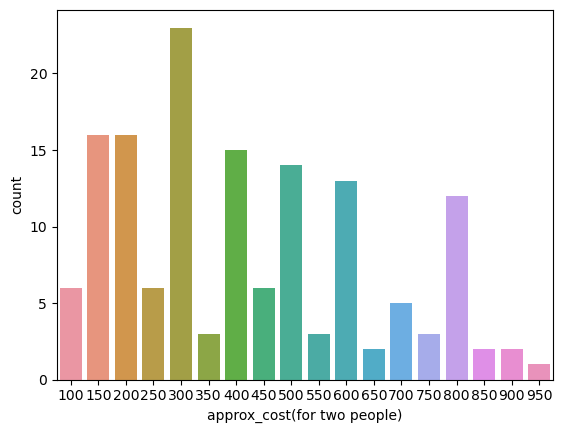

In [20]:
couple_data = DataFrame['approx_cost(for two people)']
sns.countplot(x = couple_data)

In [21]:
#or

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

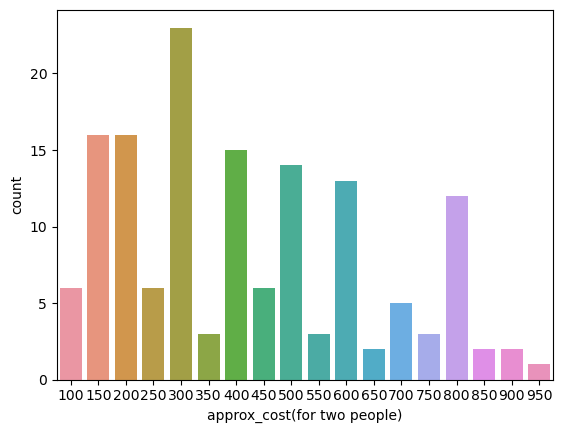

In [22]:
sns.countplot(x = DataFrame['approx_cost(for two people)'])